### E-Commerce Data Analysis Using Python (EDA)



In [ ]:
%pip install pandas
%pip install matplotlib

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

pd.options.mode.chained_assignment = None  # To suppress SettingWithCopyWarning

In [10]:
# Create dataframe from CSV file

data = pd.read_csv('C:/Users/E-Commerce Data/ecomm_data.csv', encoding = 'unicode_escape')

In [ ]:
data.head(10)

In [ ]:
data.tail()

 Generating a sample random row

In [19]:
data.sample()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
183952,552672,85123a,WHITE HANGING HEART T-LIGHT HOLDER,1,5/10/2011 15:06,6.63,NaN,United Kingdom


Dimensions of the dataframe

In [22]:
data.shape

(541909, 8)

Basic information about the dataframe

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


Descriptive statistics of the data

In [24]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


Data type of the columns

In [27]:
data.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [26]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

In [ ]:
# Type cast for column 'CustomerID' from float to int
data = data.astype({'CustomerID':int})

Check for missing values

In [44]:
data.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [36]:
# Fill missing values in theDescription column as "unknown"
data['Description'] = data['Description'].fillna('Unknown')

Checking negative Unit Price

In [42]:
#data['UnitPrice'] < 0
data[data['UnitPrice'] < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,<NA>,United Kingdom
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,<NA>,United Kingdom


In [43]:
# Drop rows with missing values in the CustomerID column
data = data.dropna(subset=['CustomerID'])

Changing the data type of column CustomerID to int data type

In [47]:
data = data.astype({'CustomerID':'Int32'})

In [48]:
data.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID              Int32
Country                object
dtype: object

Finding the number of duplicate rows in the DataFrame

In [53]:
#data.duplicated()
data.duplicated().sum()

np.int64(0)

In [52]:
data = data.drop_duplicates()

In [54]:
data.shape

(401604, 8)

Calculating the total sales for each invoice

In [55]:
data['TotalSales'] = data['Quantity'] * data['UnitPrice']

In [56]:
data.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00


In [57]:
data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'TotalSales'],
      dtype='object')

Finding maximum, minimum and average total sales

In [58]:
data['TotalSales'].max()

np.float64(168469.6)

In [59]:
data['TotalSales'].min()

np.float64(-168469.6)

In [60]:
data['UnitPrice'].min()

np.float64(0.0)

In [61]:
data['Quantity'].min()

np.int64(-80995)

Removing the negative quantity purchases from the dataframe

In [62]:
data[data['Quantity'] < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527,United Kingdom,-27.50
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311,United Kingdom,-4.65
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548,United Kingdom,-19.80
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom,-6.96
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom,-6.96
...,...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397,United Kingdom,-9.13
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498,United Kingdom,-224.69
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311,United Kingdom,-54.75
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315,United Kingdom,-1.25


In [63]:
data = data[data['Quantity'] > 0]

In [64]:
# Check min to confirm for positive quantities only
data['Quantity'].min()

np.int64(1)

In [65]:
data.shape

(392732, 9)

In [66]:
data.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID,TotalSales
count,392732.000000,392732,392732.000000,392732.0,392732.000000
mean,13.153718,2011-07-10 19:15:24.576301568,3.125596,15287.734822,22.629195
min,1.000000,2010-12-01 08:26:00,0.000000,12346.0,0.000000
25%,2.000000,2011-04-07 11:12:00,1.250000,13955.0,4.950000
50%,6.000000,2011-07-31 12:02:00,1.950000,15150.0,12.390000
75%,12.000000,2011-10-20 12:53:00,3.750000,16791.0,19.800000
max,80995.000000,2011-12-09 12:50:00,8142.750000,18287.0,168469.600000
std,181.588420,NaN,22.240725,1713.567773,311.083465


All unique values in a column

In [67]:
data.Country.unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Finland',
       'Austria', 'Greece', 'Singapore', 'Lebanon',
       'United Arab Emirates', 'Israel', 'Saudi Arabia', 'Czech Republic',
       'Canada', 'Unspecified', 'Brazil', 'USA', 'European Community',
       'Bahrain', 'Malta', 'RSA'], dtype=object)

Total number of unique values in each column

In [68]:
data.Country.nunique()

37

In [69]:
# Check the unique values in all columns
data.nunique()

InvoiceNo      18536
StockCode       3665
Description     3877
Quantity         302
InvoiceDate    17286
UnitPrice        441
CustomerID      4339
Country           37
TotalSales      2940
dtype: int64

Unique values with their count in a column

In [70]:
data.Country.value_counts()

Country
United Kingdom          349227
Germany                   9027
France                    8327
EIRE                      7228
Spain                     2480
Netherlands               2363
Belgium                   2031
Switzerland               1842
Portugal                  1453
Australia                 1184
Norway                    1072
Italy                      758
Channel Islands            747
Finland                    685
Cyprus                     603
Sweden                     450
Austria                    398
Denmark                    380
Poland                     330
Japan                      321
Israel                     245
Unspecified                241
Singapore                  222
Iceland                    182
USA                        179
Canada                     151
Greece                     145
Malta                      112
United Arab Emirates        68
European Community          60
RSA                         58
Lebanon                     45


In [ ]:
#data.Country.value_counts() > 1000
data.Country.value_counts()[data.Country.value_counts() > 1000]

Country
United Kingdom    349227
Germany             9027
France              8327
EIRE                7228
Spain               2480
Netherlands         2363
Belgium             2031
Switzerland         1842
Portugal            1453
Australia           1184
Norway              1072
Name: count, dtype: int64

Purchases made by Japan

In [76]:
#data.Country == 'Japan'
#data[data.Country == 'Japan']
data.loc[data.Country == 'Japan']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales
9783,537218,85016,SET OF 6 VINTAGE NOTELETS KIT,6,2010-12-05 15:46:00,2.55,12763,Japan,15.30
9784,537218,21506,"FANCY FONT BIRTHDAY CARD,",12,2010-12-05 15:46:00,0.42,12763,Japan,5.04
9785,537218,22716,CARD CIRCUS PARADE,12,2010-12-05 15:46:00,0.42,12763,Japan,5.04
9786,537218,22983,CARD BILLBOARD FONT,12,2010-12-05 15:46:00,0.42,12763,Japan,5.04
9787,537218,22030,SWALLOWS GREETING CARD,12,2010-12-05 15:46:00,0.42,12763,Japan,5.04
...,...,...,...,...,...,...,...,...,...
475874,576923,21217,RED RETROSPOT ROUND CAKE TINS,12,2011-11-17 10:52:00,8.95,12753,Japan,107.40
475875,576923,23493,VINTAGE DOILY TRAVEL SEWING KIT,100,2011-11-17 10:52:00,1.95,12753,Japan,195.00
475876,576923,23494,VINTAGE DOILY DELUXE SEWING KIT,40,2011-11-17 10:52:00,4.95,12753,Japan,198.00
475877,576923,23380,PACK OF 12 VINTAGE DOILY TISSUES,144,2011-11-17 10:52:00,0.39,12753,Japan,56.16


In [77]:
# View product description, quantity and total sales of purchases made from Japan
data.loc[data.Country == 'Japan', ['Description', 'Quantity', 'TotalSales']]

,Description,Quantity,TotalSales
9783,SET OF 6 VINTAGE NOTELETS KIT,6,15.30
9784,"FANCY FONT BIRTHDAY CARD,",12,5.04
9785,CARD CIRCUS PARADE,12,5.04
9786,CARD BILLBOARD FONT,12,5.04
9787,SWALLOWS GREETING CARD,12,5.04
...,...,...,...
475874,RED RETROSPOT ROUND CAKE TINS,12,107.40
475875,VINTAGE DOILY TRAVEL SEWING KIT,100,195.00
475876,VINTAGE DOILY DELUXE SEWING KIT,40,198.00
475877,PACK OF 12 VINTAGE DOILY TISSUES,144,56.16


Selecting purchases of product PARTY BUNTING where Quantity > 100

In [81]:
data.loc[(data.Description == 'PARTY BUNTING') & (data.Quantity > 100), 'Description':]

,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales
121916,PARTY BUNTING,150,2011-03-17 10:52:00,4.15,15301,United Kingdom,622.5
179371,PARTY BUNTING,150,2011-05-08 12:13:00,4.15,13694,United Kingdom,622.5
182759,PARTY BUNTING,150,2011-05-10 12:11:00,4.15,14680,United Kingdom,622.5
204194,PARTY BUNTING,150,2011-05-25 12:06:00,4.15,14680,United Kingdom,622.5
232836,PARTY BUNTING,150,2011-06-20 10:25:00,4.15,17723,United Kingdom,622.5
253946,PARTY BUNTING,200,2011-07-07 10:43:00,4.15,17723,United Kingdom,830.0
256228,PARTY BUNTING,150,2011-07-08 13:26:00,4.15,14680,United Kingdom,622.5
272031,PARTY BUNTING,150,2011-07-20 14:39:00,4.15,17511,United Kingdom,622.5
291259,PARTY BUNTING,150,2011-08-04 18:37:00,4.15,17723,United Kingdom,622.5
342457,PARTY BUNTING,150,2011-09-15 12:56:00,4.15,13694,United Kingdom,622.5


All records of the product water bottle

In [82]:
data[data.Description.str.contains('WATER BOTTLE')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
61,536373,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 09:02:00,3.39,17850,United Kingdom,20.34
78,536375,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 09:32:00,3.39,17850,United Kingdom,20.34
82,536376,22114,HOT WATER BOTTLE TEA AND SYMPATHY,48,2010-12-01 09:32:00,3.45,15291,United Kingdom,165.60
229,536390,21485,RETROSPOT HEART HOT WATER BOTTLE,24,2010-12-01 10:19:00,4.25,17511,United Kingdom,102.00
...,...,...,...,...,...,...,...,...,...
541712,581567,21479,WHITE SKULL HOT WATER BOTTLE,4,2011-12-09 11:56:00,4.25,16626,United Kingdom,17.00
541713,581567,23356,LOVE HOT WATER BOTTLE,3,2011-12-09 11:56:00,5.95,16626,United Kingdom,17.85
541720,581570,21481,FAWN BLUE HOT WATER BOTTLE,4,2011-12-09 11:59:00,3.75,12662,Germany,15.00
541877,581585,22113,GREY HEART HOT WATER BOTTLE,4,2011-12-09 12:31:00,4.25,15804,United Kingdom,17.00


Splitting the data into Groups
###### Finding the country with highest number of unique customers

In [84]:
data.groupby('Country')['CustomerID'].nunique().sort_values(ascending=False)

Country
United Kingdom          3921
Germany                   94
France                    87
Spain                     30
Belgium                   25
Switzerland               21
Portugal                  19
Italy                     14
Finland                   12
Austria                   11
Norway                    10
Australia                  9
Denmark                    9
Netherlands                9
Channel Islands            9
Japan                      8
Sweden                     8
Cyprus                     8
Poland                     6
Unspecified                4
USA                        4
Canada                     4
Greece                     4
Israel                     3
EIRE                       3
United Arab Emirates       2
Bahrain                    2
Malta                      2
Brazil                     1
Lebanon                    1
Iceland                    1
Czech Republic             1
European Community         1
Saudi Arabia               1
RSA   

Sum of total sales by Country

In [86]:
# Group data by country and calculate total sales for each country
sales_c = data.groupby('Country')['TotalSales'].sum().sort_values(ascending=False)
sales_c.head(10)

Country
United Kingdom    7285024.644
Netherlands        285446.340
EIRE               265262.460
Germany            228678.400
France             208934.310
Australia          138453.810
Spain               61558.560
Switzerland         56443.950
Belgium             41196.340
Sweden              38367.830
Name: TotalSales, dtype: float64

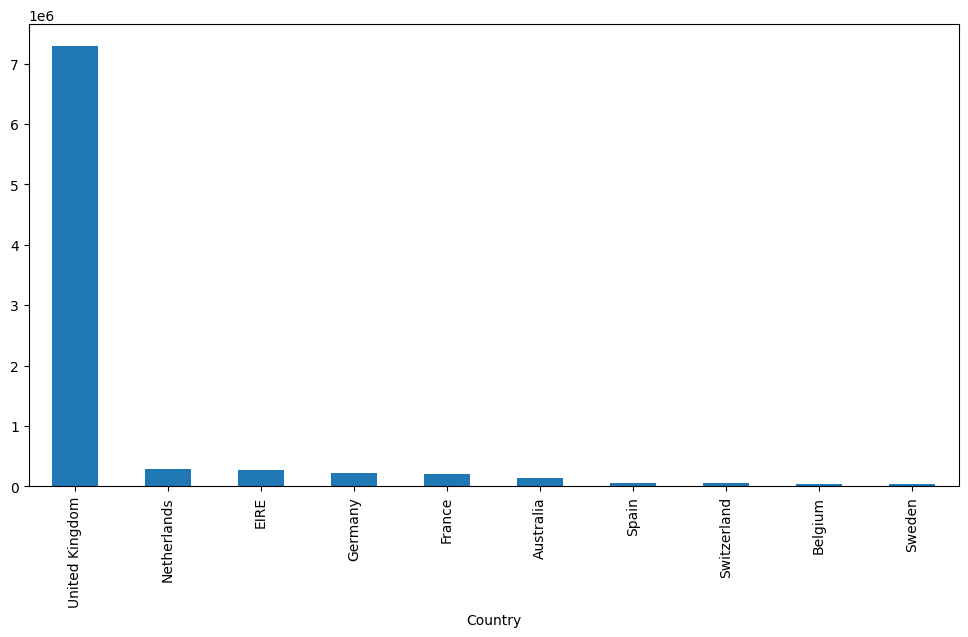

In [88]:
# Viz of sales by country
top_sales = sales_c[:10]
top_sales.plot.bar(figsize=(12,6))
plt.show()

Average sales by Country

In [92]:
avg_sales = data.groupby('Country')['TotalSales'].mean().sort_values(ascending=False)
avg_sales.head(10)
avg_sales.tail(10)

Country
Portugal              22.970296
Cyprus                22.392786
Poland                22.226212
European Community    21.670833
United Kingdom        20.860428
Belgium               20.283772
USA                   20.002179
RSA                   17.281207
Saudi Arabia          16.213333
Unspecified           11.040539
Name: TotalSales, dtype: float64

Average sales in UK

In [93]:
avg_uk = data.Country == 'United Kingdom'
data.loc[avg_uk, 'TotalSales'].mean()

np.float64(20.860427870697283)

Total amount spent by each customer

In [96]:
cust = data.groupby('CustomerID')['TotalSales'].sum().sort_values(ascending=False)
cust

CustomerID
14646    280206.02
18102    259657.30
17450    194390.79
16446    168472.50
14911    143711.17
           ...    
17956        12.75
16454         6.90
14792         6.20
16738         3.75
13256         0.00
Name: TotalSales, Length: 4339, dtype: float64

In [97]:
# Top 10 customers by spending
top_10 = cust[:10]
top_10

CustomerID
14646    280206.02
18102    259657.30
17450    194390.79
16446    168472.50
14911    143711.17
12415    124914.53
14156    117210.08
17511     91062.38
16029     80850.84
12346     77183.60
Name: TotalSales, dtype: float64

Viz of top 10 customers

<Axes: xlabel='CustomerID'>

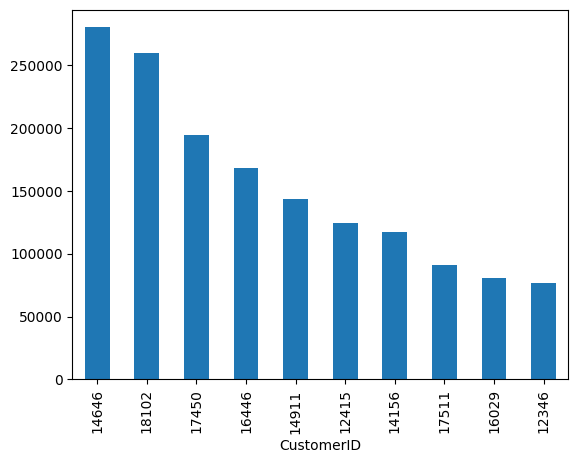

In [98]:
top_10.plot(kind='bar', )

Top 10 customers who have ordered bulk quantity

In [100]:
bulk = data.groupby('CustomerID')['Quantity'].sum().sort_values(ascending=False).head(10)
bulk

CustomerID
14646    197491
16446     80997
14911     80490
12415     77670
12346     74215
17450     69973
17511     64549
18102     64124
13694     63312
14298     58343
Name: Quantity, dtype: int64

<Axes: xlabel='CustomerID'>

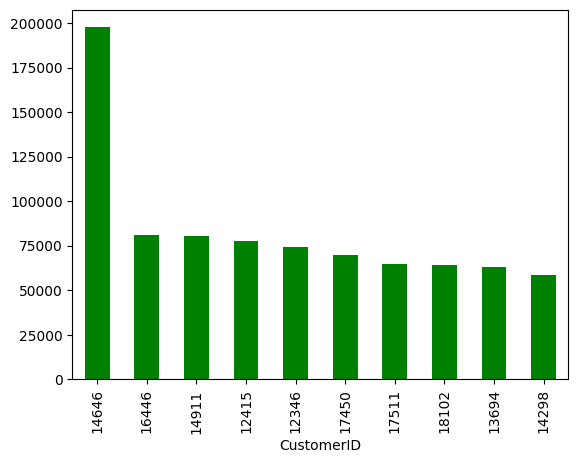

In [101]:
# Create bar chart for top 10 bulk orders
bulk.plot(kind="bar", color='green')

Most purchased products

In [103]:
most_p = data.groupby(['CustomerID', 'Description'])['Quantity'].sum().sort_values(ascending=False)
most_p.head(10)

CustomerID  Description                      
16446       PAPER CRAFT , LITTLE BIRDIE          80995
12346       MEDIUM CERAMIC TOP STORAGE JAR       74215
13256       ASSTD DESIGN 3D PAPER STICKERS       12540
16422       BROCADE RING PURSE                   10080
16333       WORLD WAR 2 GLIDERS ASSTD DESIGNS    10080
17949       POPCORN HOLDER                        9292
16333       RED  HARMONICA IN BOX                 8120
16308       SMALL CHINESE STYLE SCISSOR           8000
12901       WORLD WAR 2 GLIDERS ASSTD DESIGNS     6768
17306       PACK OF 12 LONDON TISSUES             6624
Name: Quantity, dtype: int64

In [104]:
most_p.reset_index()

,CustomerID,Description,Quantity
0,16446,"PAPER CRAFT , LITTLE BIRDIE",80995
1,12346,MEDIUM CERAMIC TOP STORAGE JAR,74215
2,13256,ASSTD DESIGN 3D PAPER STICKERS,12540
3,16422,BROCADE RING PURSE,10080
4,16333,WORLD WAR 2 GLIDERS ASSTD DESIGNS,10080
...,...,...,...
268290,14606,TOOL BOX SOFT TOY,1
268291,14606,TRIANGULAR POUFFE VINTAGE,1
268292,14606,TRAVEL CARD WALLET RETRO PETALS,1
268293,14606,TRAVEL CARD WALLET I LOVE LONDON,1


Most popular products

In [106]:
most_pop = data.groupby('Description')['Quantity'].sum().sort_values(ascending=False)
most_pop.head(10)

Description
PAPER CRAFT , LITTLE BIRDIE           80995
MEDIUM CERAMIC TOP STORAGE JAR        77916
WORLD WAR 2 GLIDERS ASSTD DESIGNS     54319
JUMBO BAG RED RETROSPOT               46078
WHITE HANGING HEART T-LIGHT HOLDER    36706
ASSORTED COLOUR BIRD ORNAMENT         35263
PACK OF 72 RETROSPOT CAKE CASES       33670
POPCORN HOLDER                        30919
RABBIT NIGHT LIGHT                    27153
MINI PAINT SET VINTAGE                26076
Name: Quantity, dtype: int64

In [107]:
data.loc[data['Description'] == 'RABBIT NIGHT LIGHT','Quantity'].sum()

np.int64(27153)

Retreive the year and month from invoice date

In [108]:
data['Year'] = data['InvoiceDate'].dt.year

In [109]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales,Year
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010


In [110]:
data['Year'].value_counts()

Year
2011    367059
2010     25673
Name: count, dtype: int64

In [112]:
data['Month'] = data['InvoiceDate'].dt.month_name()
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales,Year,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010,December
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,December
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010,December
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,December
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,December


Sales per year

In [114]:
sales_year = data.groupby(['Year','Month'])['TotalSales'].sum().reset_index()
sales_year

,Year,Month,TotalSales
0,2010,December,570422.730
1,2011,April,468374.331
2,2011,August,644051.040
3,2011,December,517190.440
4,2011,February,446084.920
5,2011,January,568101.310
6,2011,July,598962.901
7,2011,June,660046.050
8,2011,March,594081.760
9,2011,May,677355.150


In [115]:
sales_2010 = data[data['Year']==2010].groupby(['Month'])['TotalSales'].sum().reset_index()
sales_2010

,Month,TotalSales
0,December,570422.73


In [116]:
sales_2011 = data[data['Year']==2011].groupby(['Month'])['TotalSales'].sum().reset_index()
sales_2011

,Month,TotalSales
0,April,468374.331
1,August,644051.040
2,December,517190.440
3,February,446084.920
4,January,568101.310
5,July,598962.901
6,June,660046.050
7,March,594081.760
8,May,677355.150
9,November,1156205.610


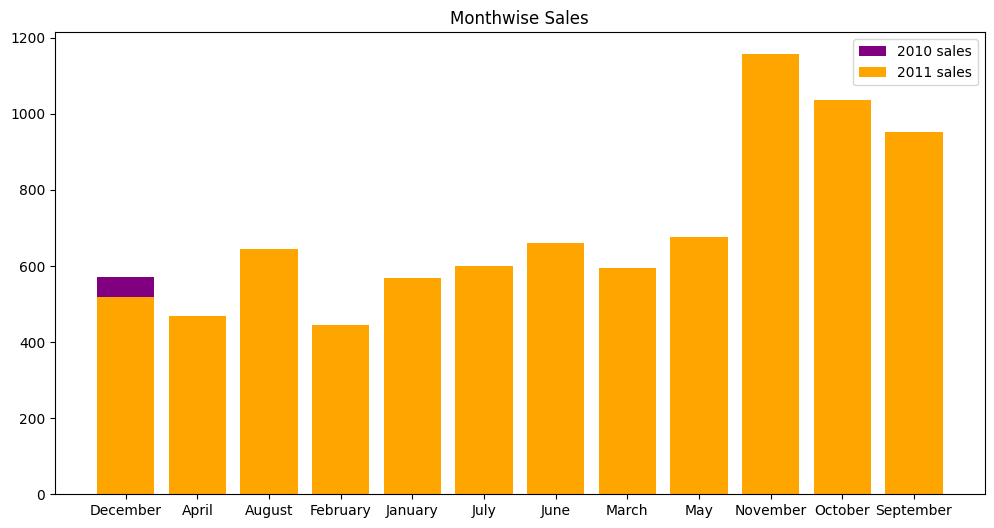

In [117]:
# Viz sales per year
plt.figure(figsize=(12,6))
plt.bar(sales_2010['Month'], sales_2010['TotalSales']/1000, label='2010 sales', color='purple')
plt.bar(sales_2011['Month'], sales_2011['TotalSales']/1000, label='2011 sales', color='orange')
plt.legend()
plt.title('Monthwise Sales')
plt.show()